# 라이브러리 로드 및 기본 세팅

In [3]:
# !pip install catboost

In [4]:
# !pip install pycaret

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
import pandas as pd
from pycaret.classification import *
from tqdm import tqdm
from pycaret.utils import check_metric

# 데이콘 점수

In [7]:
# 자체 점수 : 0.6906
# 제출 점수(제출 날짜) : 0.6795178371(2022-01-06 16:39:44)

# 설정

In [8]:
# pycaret : cat
# probability_threshold : 단계별 적용
# pca, comb
# 순서형 특성 수치형으로 지정(4개)
# 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [9]:
# 제거된 특성(4개)
# 'id',
# 'contents_open_dt',
# 'person_prefer_f',
# 'person_prefer_g'

In [10]:
# 매칭 속성

In [11]:
# d_l_match_yn : 'person_prefer_d_1_l', 'contents_attribute_d_l' 매칭 여부
# d_m_match_yn : 'person_prefer_d_1_n', 'contents_attribute_d_n' 매칭 여부'
# d_s_match_yn : 'person_prefer_d_1', 'contents_attribute_d' 매칭 여부
# h_l_match_yn : 'person_prefer_h_1_l', 'contents_attribute_h_l' 매칭 여부
# h_m_match_yn : 'person_prefer_h_1_m', 'contents_attribute_h_m' 매칭 여부
# h_s_match_yn : 'person_prefer_h_1', 'contents_attribute_h' 매칭 여부

# 데이터 불러오기

In [12]:
train = pd.read_csv('../data/df_train.csv')
test = pd.read_csv('../data/df_test.csv')
# train = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/df_train.csv')
# test = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/df_test.csv')

# 데이터 확인

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 63 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

In [14]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,316,3,398,94,368,58,422,94,1607,1606,1605,2016
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,417,94,400,94,399,94,417,94,1607,1606,1605,2016
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,364,48,528,250,366,48,363,48,1599,1595,1572,2016
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,379,71,495,226,315,1,381,71,1607,1606,1605,2016
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,483,208,481,208,480,208,381,71,1607,1606,1605,2016


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      46404 non-null  int64 
 1   d_l_match_yn            46404 non-null  bool  
 2   d_m_match_yn            46404 non-null  bool  
 3   d_s_match_yn            46404 non-null  bool  
 4   h_l_match_yn            46404 non-null  bool  
 5   h_m_match_yn            46404 non-null  bool  
 6   h_s_match_yn            46404 non-null  bool  
 7   person_attribute_a      46404 non-null  int64 
 8   person_attribute_a_1    46404 non-null  int64 
 9   person_attribute_b      46404 non-null  int64 
 10  person_prefer_c         46404 non-null  int64 
 11  person_prefer_d_1       46404 non-null  int64 
 12  person_prefer_d_2       46404 non-null  int64 
 13  person_prefer_d_3       46404 non-null  int64 
 14  person_prefer_e         46404 non-null  int64 
 15  pe

In [16]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,528,250,366,48,359,48,528,250,1146,1128,1021,2010
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,523,250,528,250,359,48,528,250,1610,1606,1605,2016
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,453,169,451,169,452,169,453,169,1812,1811,1810,2020
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,453,169,451,169,452,169,453,169,101,100,99,2006
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,454,169,453,169,316,3,453,169,984,980,954,2009


# 필요 데이터 추출

## 훈련에 의미가 적은 열 제거

In [17]:
# 제거된 특성(4개)
# 'id',
# 'contents_open_dt',
# 'person_prefer_f',
# 'person_prefer_g',

In [18]:
# 삭제할 특성
pop_col = ['id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g']
len(pop_col)

4

In [19]:
train = train.drop(pop_col, axis=1) 
test = test.drop(pop_col, axis=1)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 59 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   d_l_match_yn            501951 non-null  bool 
 1   d_m_match_yn            501951 non-null  bool 
 2   d_s_match_yn            501951 non-null  bool 
 3   h_l_match_yn            501951 non-null  bool 
 4   h_m_match_yn            501951 non-null  bool 
 5   h_s_match_yn            501951 non-null  bool 
 6   person_attribute_a      501951 non-null  int64
 7   person_attribute_a_1    501951 non-null  int64
 8   person_attribute_b      501951 non-null  int64
 9   person_prefer_c         501951 non-null  int64
 10  person_prefer_d_1       501951 non-null  int64
 11  person_prefer_d_2       501951 non-null  int64
 12  person_prefer_d_3       501951 non-null  int64
 13  person_prefer_e         501951 non-null  int64
 14  person_prefer_h_1       501951 non-null  int64
 15  

In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   d_l_match_yn            46404 non-null  bool 
 1   d_m_match_yn            46404 non-null  bool 
 2   d_s_match_yn            46404 non-null  bool 
 3   h_l_match_yn            46404 non-null  bool 
 4   h_m_match_yn            46404 non-null  bool 
 5   h_s_match_yn            46404 non-null  bool 
 6   person_attribute_a      46404 non-null  int64
 7   person_attribute_a_1    46404 non-null  int64
 8   person_attribute_b      46404 non-null  int64
 9   person_prefer_c         46404 non-null  int64
 10  person_prefer_d_1       46404 non-null  int64
 11  person_prefer_d_2       46404 non-null  int64
 12  person_prefer_d_3       46404 non-null  int64
 13  person_prefer_e         46404 non-null  int64
 14  person_prefer_h_1       46404 non-null  int64
 15  person_prefer_h_2  

## 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경

In [22]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
train = train.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
train = train.rename(columns={'contents_attribute_j_1':'contents_attribute_j_a'})
train.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_a,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,316,3,398,94,368,58,422,94,1607,1606,1605,2016
1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,417,94,400,94,399,94,417,94,1607,1606,1605,2016
2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,364,48,528,250,366,48,363,48,1599,1595,1572,2016
3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,379,71,495,226,315,1,381,71,1607,1606,1605,2016
4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,483,208,481,208,480,208,381,71,1607,1606,1605,2016


In [23]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
test = test.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
test = test.rename(columns={'contents_attribute_j_1':'contents_attribute_j_a'})
test.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_a,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,528,250,366,48,359,48,528,250,1146,1128,1021,2010
1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,523,250,528,250,359,48,528,250,1610,1606,1605,2016
2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,453,169,451,169,452,169,453,169,1812,1811,1810,2020
3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,453,169,451,169,452,169,453,169,101,100,99,2006
4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,454,169,453,169,316,3,453,169,984,980,954,2009


## PCA

In [24]:
train = train.astype(int)
test= test.astype(int)

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()
ss_train = scaler.fit_transform(train)
ss_test = scaler.fit_transform(test)

In [65]:
from sklearn.decomposition import PCA

In [127]:
pca = PCA(n_components=25)
pca_train = pca.fit_transform(ss_train)
pca_train.shape

(501951, 25)

In [128]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [129]:
pca.components_.shape

(25, 59)

Text(0, 0.5, '주성분')

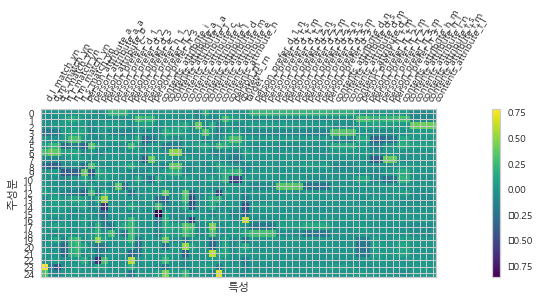

In [130]:
matfig = plt.figure(figsize=(20,3))
plt.matshow(pca.components_, cmap='viridis', fignum=matfig.number)
plt.yticks(range(25))
plt.colorbar()
plt.xticks(range(len(train.columns)), train.columns, rotation=60, ha='left')
plt.xlabel('특성')
plt.ylabel('주성분')

## bin_numeric_features

In [25]:
# bin_numeric_features : ❌
  # 미리 정의된 bin을 사용하여 연속된 값을 범주형 값으로 변환하는 방법
  # 연속된 값의 고유값이 너무 많거나 예상 범위를 벗어난 극단값이 거의 없는 경우에 효과적

In [55]:
# 고유값 개수가 100개 이상인 특성
# person_prefer_d_1 : 1093
# person_prefer_d_2 : 1081
# person_prefer_d_3 : 1043
# person_prefer_h_1 : 279
# person_prefer_h_2 : 279
# person_prefer_h_3 : 279
# contents_attribute_l : 1752
# contents_attribute_d : 1065
# contents_attribute_h : 250
# person_prefer_d_1_n : 433
# person_prefer_d_1_s : 137
# person_prefer_d_2_n : 435
# person_prefer_d_2_s : 137
# person_prefer_d_3_n : 420
# person_prefer_d_3_s : 136
# contents_attribute_d_n : 431
# contents_attribute_d_s : 137
# person_prefer_h_1_m : 246
# person_prefer_h_2_m : 246
# person_prefer_h_3_m : 246
# contents_attribute_h_m : 228
# contents_attribute_l_n : 736
# contents_attribute_l_s : 305

In [56]:
# bin_numeric_features 적용할 특성
# 'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3', 
# 'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
# 'contents_attribute_l', 'contents_attribute_d', 'contents_attribute_h'
# 'person_prefer_d_1_n', 'person_prefer_d_1_s', 
# 'person_prefer_d_2_n', 'person_prefer_d_2_s',
# 'person_prefer_d_3_n', 'person_prefer_d_3_s',
# 'contents_attribute_d_n', 'contents_attribute_d_s',
# 'person_prefer_h_1_m', 'person_prefer_h_2_m', 'person_prefer_h_3_m',
# 'contents_attribute_h_m', 'contents_attribute_l_n', 'contents_attribute_l_s'

In [57]:
# bin_cols = ['person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3', 
#             'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
#             'contents_attribute_l', 'contents_attribute_d', 'contents_attribute_h',
#             'person_prefer_d_1_n', 'person_prefer_d_1_s', 
#             'person_prefer_d_2_n', 'person_prefer_d_2_s',
#             'person_prefer_d_3_n', 'person_prefer_d_3_s',
#             'contents_attribute_d_n', 'contents_attribute_d_s', 
#             'person_prefer_h_1_m', 'person_prefer_h_2_m', 'person_prefer_h_3_m',
#             'contents_attribute_h_m', 'contents_attribute_l_n', 'contents_attribute_l_s']

## 카테고리형 특성으로 지정할 특성

In [58]:
# 원본 데이터에서 순서형 특성
# 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [59]:
# 순서형 특성 수치형으로 지정 : ⭕
# 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [60]:
cat_cols = ['person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e']
len(cat_cols)

4

# 모델 훈련/예측

In [131]:
ex = setup(train, target='target', n_jobs=-1, session_id=0, verbose=False, silent=True,
  fold=5, fold_shuffle=True, combine_rare_levels=True, 
  numeric_features=['person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'],
  normalize=True, normalize_method='zscore',
  pca=True, pca_components=25
)

In [132]:
compare_models(sort='F1', exclude=['dummy', 'svm', 'knn', 'gbc', 'ada', 'rf', 'lda', 'et'])
# 6m 8s

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6018,0.6422,0.6580,0.5912,0.6228,0.2037,0.2050,57.4000
lightgbm,Light Gradient Boosting Machine,0.5945,0.6324,0.6652,0.5825,0.6211,0.1891,0.1910,3.8700
nb,Naive Bayes,0.5558,0.5810,0.6811,0.5443,0.6051,0.1117,0.1154,0.4000
qda,Quadratic Discriminant Analysis,0.5764,0.6051,0.6377,0.5677,0.6007,0.1528,0.1540,0.8500
ridge,Ridge Classifier,0.5500,0.0000,0.5403,0.5506,0.5454,0.0999,0.1000,0.3720
lr,Logistic Regression,0.5441,0.5608,0.5264,0.5453,0.5357,0.0881,0.0882,3.1640
dt,Decision Tree Classifier,0.5347,0.5347,0.5349,0.5344,0.5347,0.0695,0.0695,10.5560


In [133]:
model1 = create_model('catboost')
# 5m 7s

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6013,0.6420,0.6584,0.5906,0.6226,0.2026,0.2039
1,0.5998,0.6406,0.6566,0.5893,0.6211,0.1997,0.2010
2,0.6041,0.6443,0.6596,0.5935,0.6248,0.2083,0.2097
3,0.6019,0.6428,0.6577,0.5913,0.6228,0.2038,0.2051
4,0.6019,0.6415,0.6578,0.5914,0.6228,0.2039,0.2052
Mean,0.6018,0.6422,0.6580,0.5912,0.6228,0.2037,0.2050
SD,0.0014,0.0013,0.0010,0.0013,0.0012,0.0028,0.0028


In [134]:
model2 = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5931,0.6323,0.6660,0.5810,0.6206,0.1863,0.1884
1,0.5925,0.6299,0.6631,0.5808,0.6192,0.1851,0.1870
2,0.5968,0.6345,0.6695,0.5843,0.6240,0.1938,0.1959
3,0.5979,0.6346,0.6695,0.5853,0.6246,0.1958,0.1979
4,0.5922,0.6305,0.6580,0.5812,0.6172,0.1844,0.1861
Mean,0.5945,0.6324,0.6652,0.5825,0.6211,0.1891,0.1910
SD,0.0024,0.0020,0.0043,0.0019,0.0028,0.0047,0.0049


In [135]:
tuned_model2 = tune_model(model2, optimize='F1')
# 2m 53s

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5750,0.6012,0.7048,0.5592,0.6236,0.1501,0.1554
1,0.5730,0.5987,0.6930,0.5586,0.6186,0.1462,0.1506
2,0.5794,0.6064,0.7122,0.5624,0.6285,0.1589,0.1648
3,0.5758,0.6022,0.6981,0.5606,0.6218,0.1517,0.1564
4,0.5753,0.5998,0.7021,0.5598,0.6229,0.1507,0.1558
Mean,0.5757,0.6017,0.7020,0.5601,0.6231,0.1515,0.1566
SD,0.0021,0.0027,0.0065,0.0013,0.0032,0.0041,0.0046


In [136]:
blended_model = blend_models([model1, tuned_model2], optimize='F1', method='soft')
# 4m 59s

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5992,0.6395,0.6692,0.5867,0.6252,0.1984,0.2004
1,0.5979,0.6380,0.6670,0.5857,0.6237,0.1958,0.1977
2,0.6023,0.6426,0.6709,0.5897,0.6276,0.2046,0.2066
3,0.6007,0.6403,0.6690,0.5883,0.6261,0.2015,0.2034
4,0.5992,0.6390,0.6672,0.5871,0.6246,0.1985,0.2004
Mean,0.5998,0.6399,0.6687,0.5875,0.6254,0.1998,0.2017
SD,0.0015,0.0016,0.0014,0.0014,0.0013,0.0030,0.0030


## train 예측, F1 자체평가

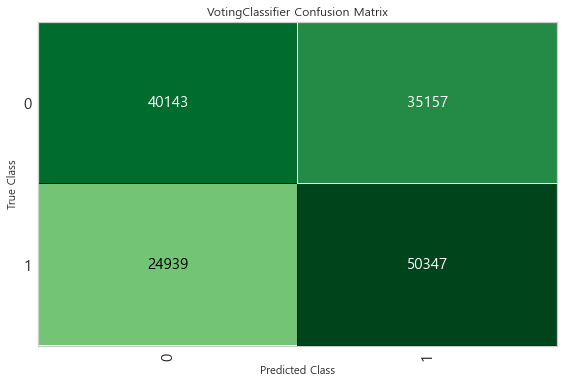

In [137]:
plot_model(blended_model, plot='confusion_matrix')

In [138]:
optimize_threshold(blended_model, false_negative=-1500, false_positive=-900)
# 25s

Optimized Probability Threshold: 0.42210000000000003 | Optimized Cost Function: -62217300


0.42210000000000003

In [139]:
th = 0.4221
tmp_train_pred = predict_model(blended_model, train, probability_threshold=th)
check_metric(train['target'], tmp_train_pred['Label'], metric = 'F1')
# fn, fp = -1500, -900 / threshold, f1 score = 0.4221, 0.6906
# 8s

0.6906

## test 예측

In [140]:
pred = predict_model(blended_model, test, probability_threshold=th)

In [141]:
pred.iloc[:,-2:].head()

,Label,Score
0,1,0.4993
1,1,0.4425
2,0,0.6720
3,1,0.5747
4,1,0.5457


In [142]:
pred['Label']

0        1
1        1
2        0
3        1
4        1
        ..
46399    1
46400    1
46401    1
46402    1
46403    1
Name: Label, Length: 46404, dtype: int32

In [143]:
pred['Label'].value_counts()

1    38103
0     8301
Name: Label, dtype: int64

# 제출파일 불러오기

In [144]:
sub = pd.read_csv('../data/sample_submission.csv')
# sub = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/sample_submission.csv')
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      46404 non-null  int64
 1   target  46404 non-null  int64
dtypes: int64(2)
memory usage: 725.2 KB


In [145]:
sub.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


# 제출파일 생성

In [146]:
sub['target'] = pred['Label']
sub.to_csv('sub_ver4.0.csv', index=False)
# sub.to_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/03_모델선정및개선/sub_ver4.0.csv', index=False)

In [147]:
sub.head()

,id,target
0,0,1
1,1,1
2,2,0
3,3,1
4,4,1


# 코드 마지막